In [1]:
import pm4py

src_log = pm4py.read_xes("5_report_diagnostics.xes")

d:\Programs\Programming\Python\lib\site-packages\pm4py\util\dt_parsing\parser.py:82: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/66 [00:00<?, ?it/s]

In [2]:
display(src_log["case:concept:name"].value_counts())
display(src_log["concept:name"].value_counts())

case:concept:name
11    10498
17     8496
53     5880
23     3264
5      3240
      ...  
31        2
43        2
42        2
1         2
0         2
Name: count, Length: 66, dtype: int64

concept:name
End:Text.TextSpan.get_Start                                                   3389
Start:Text.TextSpan.get_Start                                                 3389
Start:Text.StringText.get_Length                                              1640
End:Text.StringText.get_Length                                                1640
Start:Text.TextSpan.get_Length                                                1625
                                                                              ... 
End:CommonCompiler+<>c..cctor                                                   11
End:CommonCompiler+<>c..ctor                                                    11
Start:CommonCompiler+<>c..ctor                                                  11
Start:CommonCompiler+<>c..cctor                                                 11
End:CSharp.CommandLineDiagnosticFormatter+<>c__DisplayClass4_0.<.ctor>b__0      11
Name: count, Length: 176, dtype: int64

In [6]:
import tqdm

src_log_list = []
for row in tqdm.tqdm(src_log.iterrows(), total = len(src_log)):
    src_log_list.append(row[1].to_dict())
len(src_log_list)

100%|██████████| 44708/44708 [00:01<00:00, 29240.07it/s]


44708

In [11]:
from utils.merge_paired_events import merge_paired_events
from utils.find_first_deviation import find_first_deviation
from utils.remove_call_contents import remove_call_contents

In [34]:
log_list = remove_call_contents(src_log_list, "DiagnosticWithInfo.get_Severity", keep_call = False)
log_list = remove_call_contents(log_list, "DiagnosticFormatter.Format", keep_call = True)
len(log_list)


100%|██████████| 42532/42532 [00:00<00:00, 3272409.61it/s]


4074

100%|█████████▉| 940/942 [00:00<00:00, 52221.86it/s]


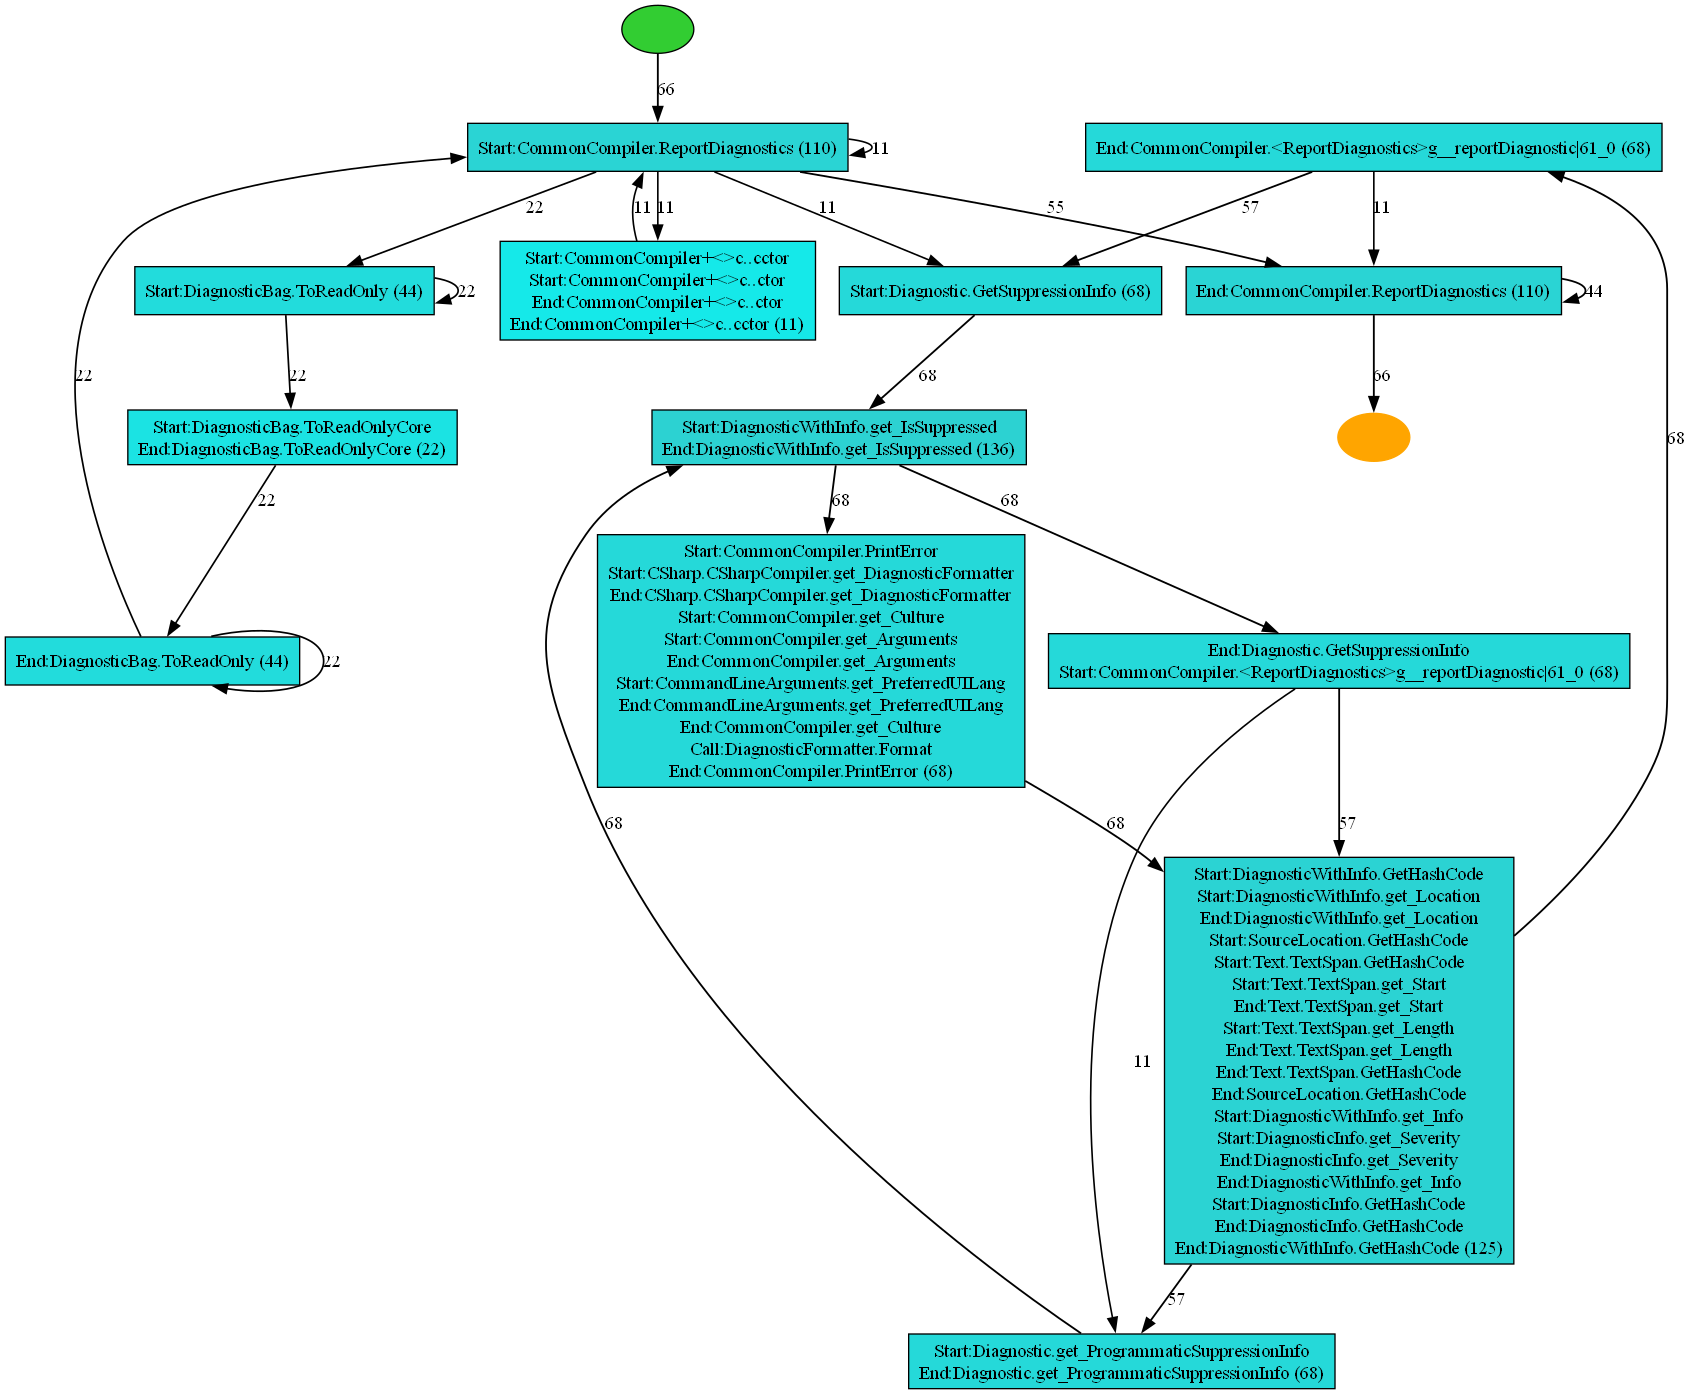

In [35]:
import pandas
pm4py.view_heuristics_net(pm4py.discover_heuristics_net(merge_paired_events(pandas.DataFrame(log_list))))